SetUp
 (credit: https://www.youtube.com/watch?v=6GUZXDef2U0)

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
%reload_ext autoreload
%autoreload

Import Data

In [6]:
# import the build-in dataset from sns
# print(sns.get_dataset_names())
crash_df = sns.load_dataset('car_crashes')
crash_df.head()

,total,speeding,alcohol,not_distracted,no_previous,ins_premium,ins_losses,abbrev
0,18.8,7.332,5.640,18.048,15.040,784.55,145.08,AL
1,18.1,7.421,4.525,16.290,17.014,1053.48,133.93,AK
2,18.6,6.510,5.208,15.624,17.856,899.47,110.35,AZ
3,22.4,4.032,5.824,21.056,21.280,827.34,142.39,AR
4,12.0,4.200,3.360,10.920,10.680,878.41,165.63,CA


Distribution Plot (disctribution for one variable)

<AxesSubplot:xlabel='not_distracted', ylabel='Count'>

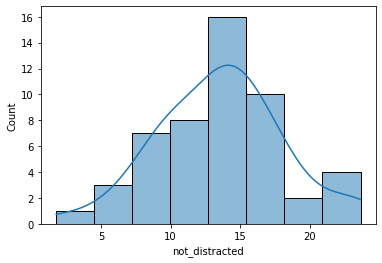

In [17]:
# histograme plot
sns.histplot(crash_df['not_distracted'], kde=True) # kde = kernel density estimatin # binds - how many bars showed
# or use sns.distplot()
# sns.distplot() will be removed from the future ver

Joint Plot (compare two distribution, polt a scatter plot by default)

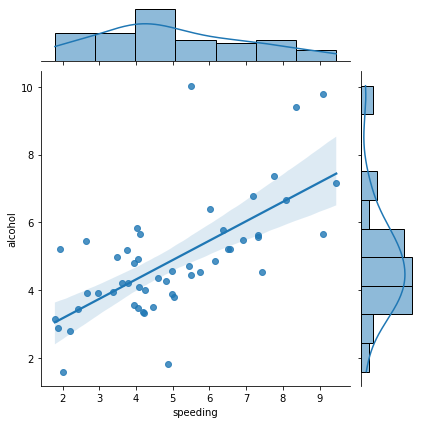

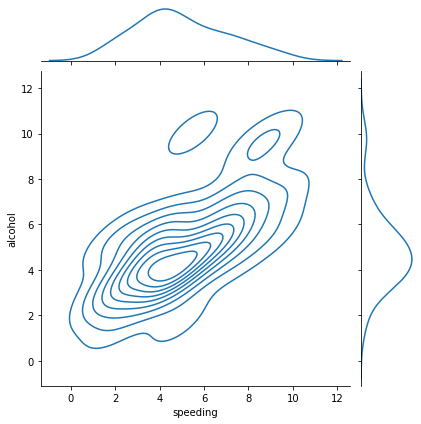

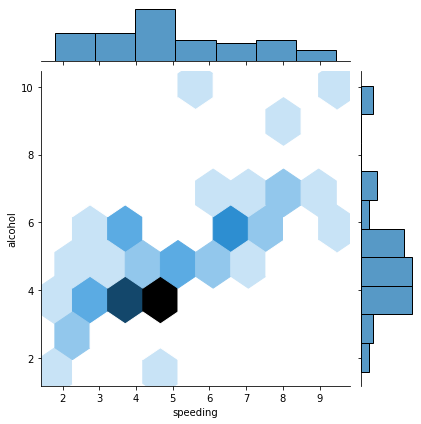

In [20]:
sns.jointplot(x = 'speeding', y='alcohol', data=crash_df, kind=r'reg')
sns.jointplot(x = 'speeding', y='alcohol', data=crash_df, kind=r'kde')
sns.jointplot(x = 'speeding', y='alcohol', data=crash_df, kind=r'hex')

KDE Plot

<AxesSubplot:xlabel='alcohol', ylabel='Density'>

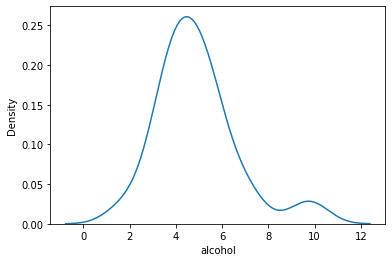

In [21]:
sns.kdeplot(crash_df['alcohol'])

Pair Plot (comparing each col data with the whole dataset)

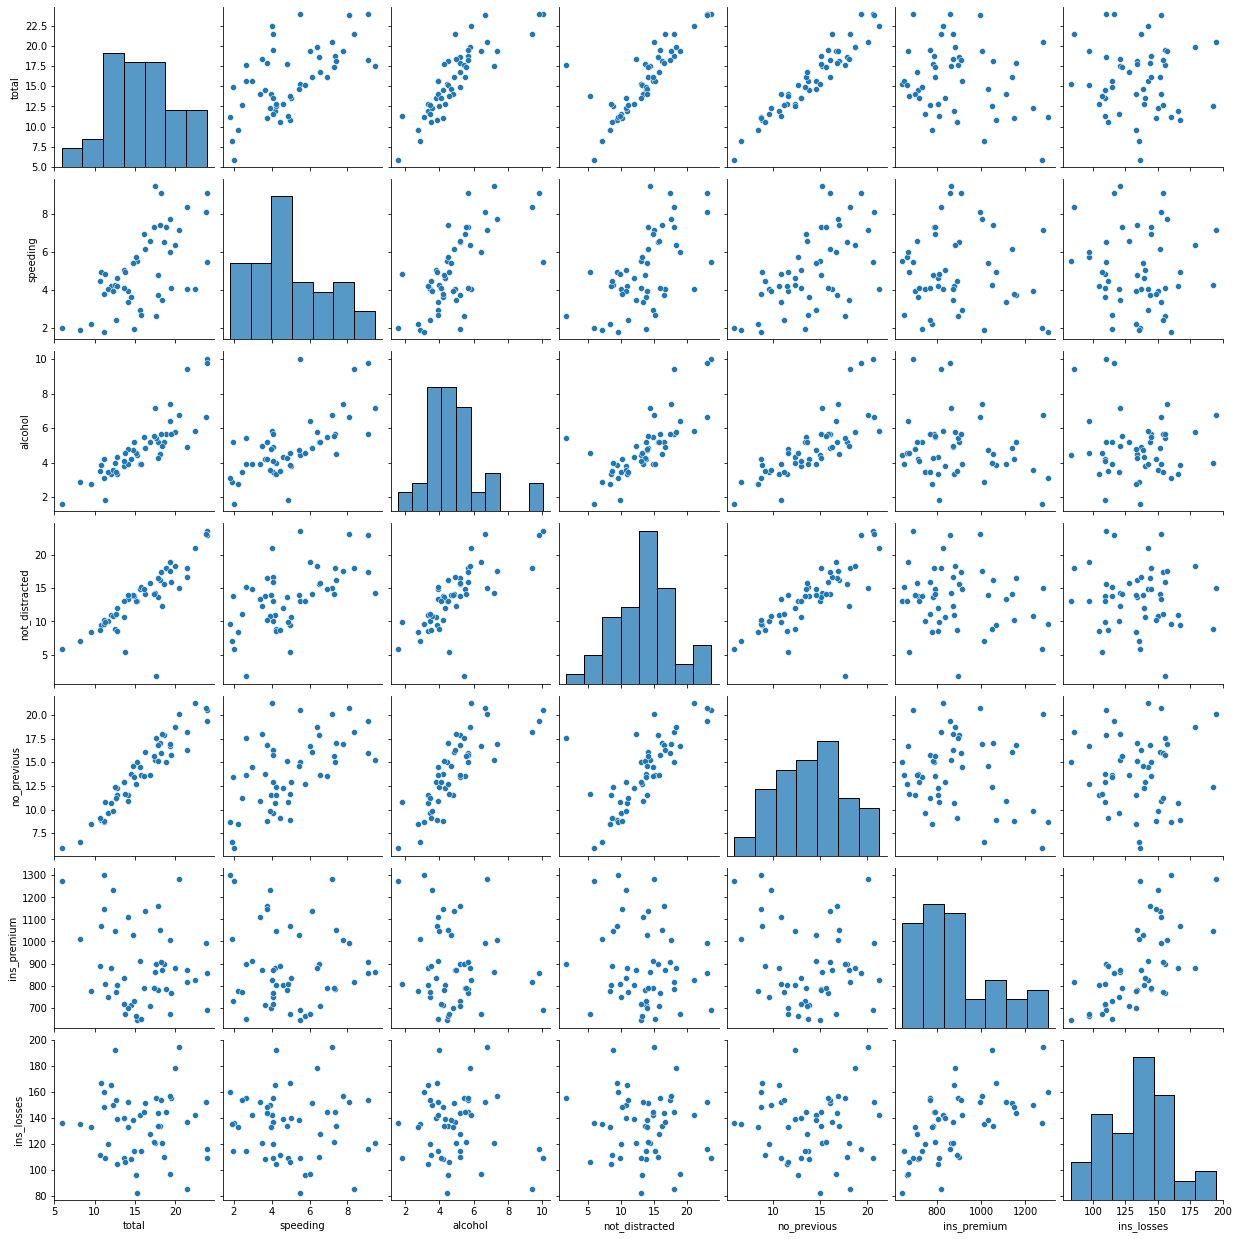

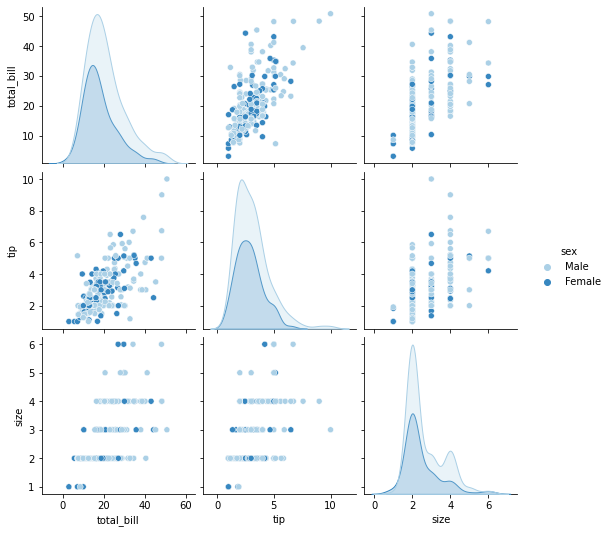

In [23]:
sns.pairplot(crash_df)

tips_df = sns.load_dataset('tips')
sns.pairplot(tips_df, hue='sex', palette='Blues')

Rug Plot (feature as density vs hisograme feature with height)

<AxesSubplot:xlabel='tip'>

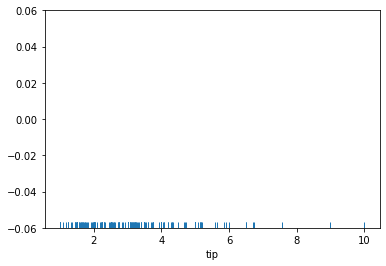

In [24]:
sns.rugplot(tips_df['tip'])

Styling

<Figure size 576x288 with 0 Axes>

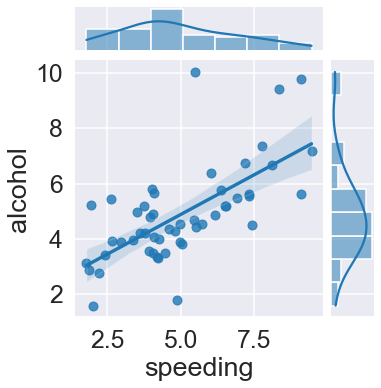

In [29]:
# styling axes
sns.set_style('tricks') # 'white', 'whitegrid', 'dark', 'ticks', 'darkgrid'
plt.figure(figsize=(8,4))
sns.set_context('talk', font_scale=1.5) # 'paper', 'talk', 'poster'
sns.jointplot(x = 'speeding', y='alcohol', data=crash_df, kind='reg')
sns.despine(left=True)

Categorical Plots

Bar Plots

<AxesSubplot:xlabel='sex', ylabel='total_bill'>

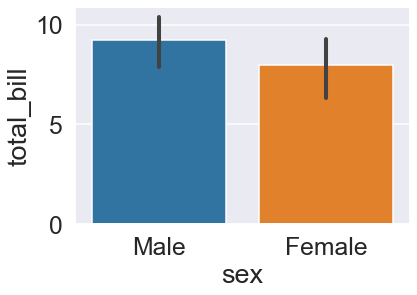

In [31]:
sns.barplot(x='sex', y='total_bill', data=tips_df, estimator=np.std)
# estimator can be np.mean, np.median, np.cov, and self-defined function

Count Plot

<AxesSubplot:xlabel='sex', ylabel='count'>

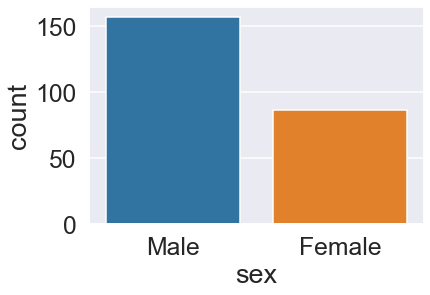

In [32]:
sns.countplot(x='sex', data=tips_df)

Box Plot (compare different variables)

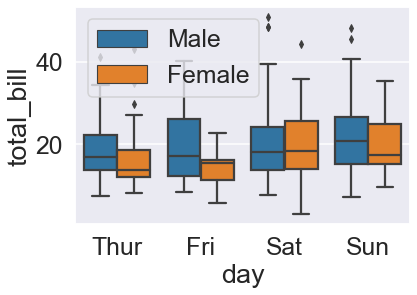

In [35]:
sns.boxplot(x='day', y='total_bill', data=tips_df, hue='sex')
plt.legend(loc=0)

Voilin Plot

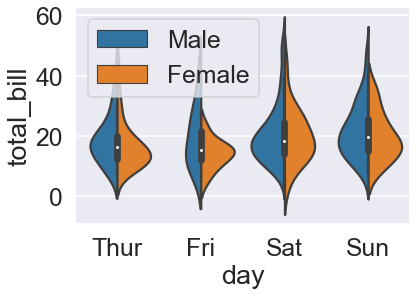

In [37]:
sns.violinplot(x='day', y='total_bill', data=tips_df, hue='sex', split=True)
plt.legend(loc=0)

Strip Plot

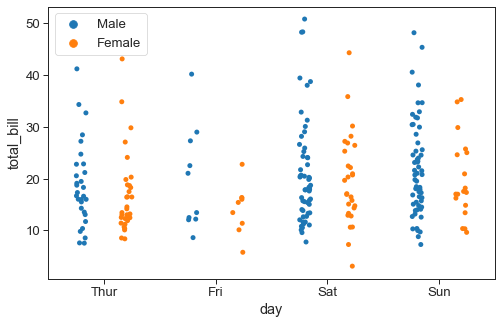

In [46]:
plt.figure(figsize=(8,5))
sns.set_style('ticks')
sns.set_context('paper', font_scale=1.5)

sns.stripplot(x='day', y='total_bill', data=tips_df, jitter=True, hue='sex', dodge=True)
# jitter makes the plots separates more from each other
# dodge separates Male and Female
plt.legend(loc=0)

Swarm Plot

<AxesSubplot:xlabel='day', ylabel='total_bill'>

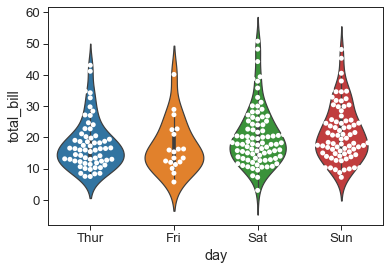

In [47]:
sns.violinplot(x='day', y='total_bill', data=tips_df)
sns.swarmplot(x='day', y='total_bill', data=tips_df, color='white')

Palettes

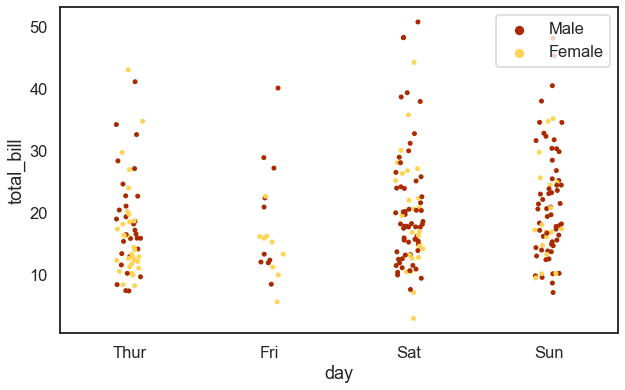

In [52]:
# search colormap in python to change color settings
plt.figure(figsize=(10,6))
sns.set_style('white')
sns.set_context('talk')

sns.stripplot(x='day', y='total_bill', data=tips_df, jitter=True, hue='sex', palette='afmhot') # magma

# upper right = 1, upper left = 2, lower left = 3, lower right = 4 (check python documentation for further info - 10 in total)
# 0 means best
plt.legend(loc=1)

Matrix Plot

Heatmaps

<AxesSubplot:xlabel='year', ylabel='month'>

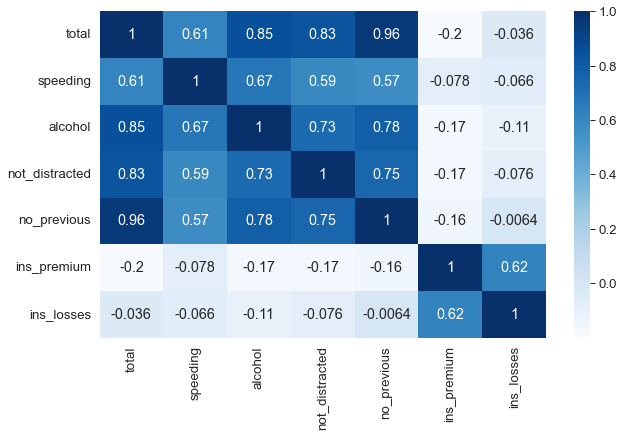

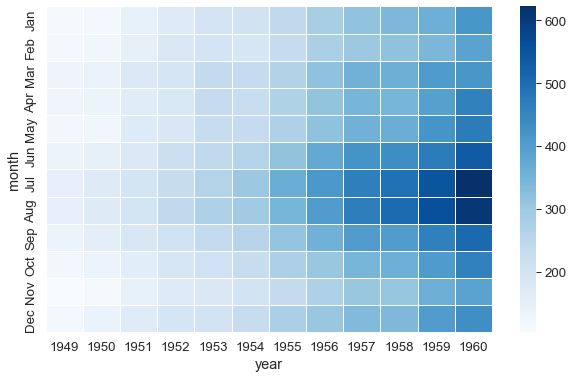

In [61]:
# way 1
plt.figure(figsize=(10,6))
sns.set_style('white')
sns.set_context('paper', font_scale=1.5)
crash_mtrix = crash_df.corr() # make df index to become cols
sns.heatmap(crash_mtrix, annot=True, cmap='Blues') # cmap='RdYlGn'

# way 2
plt.figure(figsize=(10,6))
sns.set_style('white')
sns.set_context('paper', font_scale=1.5)
flights = sns.load_dataset('flights')
flight = flights.pivot_table(index='month', columns='year', values='passengers')
sns.heatmap(flight, cmap='Blues', linecolor='white', linewidths=1)

Cluster Map

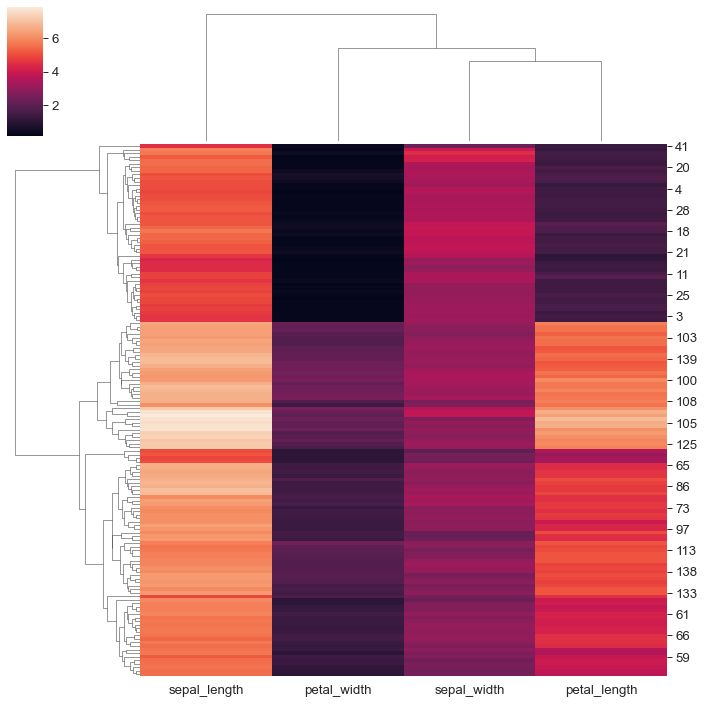

In [63]:
iris = sns.load_dataset('iris')
species = iris.pop('species')
sns.clustermap(iris)

PairGrid

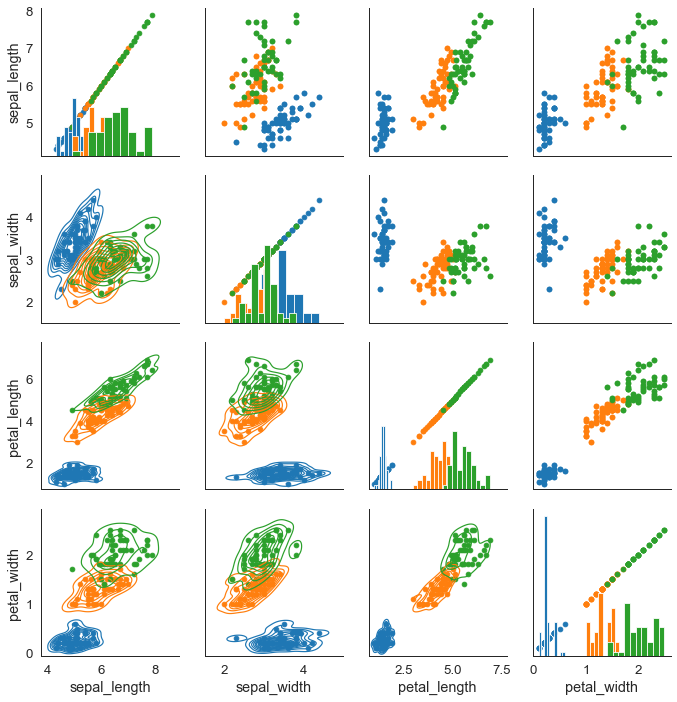

In [68]:
iris = sns.load_dataset('iris')
iris_g = sns.PairGrid(iris, hue='species')
iris_g.map(plt.scatter)
iris_g.map_diag(plt.hist) # iris_g.map_offdiag(plt.scatter)
iris_g.map_upper(plt.scatter)
iris_g.map_lower(sns.kdeplot)

iris_g = sns.PairGrid(iris, hue='species',
                        x_vars=['sepal_length', 'sepal_width'],
                        y_vars=['sepal_length', 'sepal_width'])
iris_g.add_legend()

Facet Plot

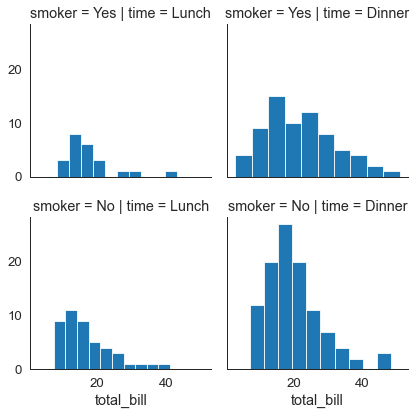

In [70]:
tips_fg = sns.FacetGrid(tips_df, col='time', row='smoker')
tips_fg.map(plt.hist, 'total_bill', bins=10) # tips_fg.map(plt.scatter, 'total_bill', 'tip')